In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. First 데이터는 가지고 있는 모든 데이터를 모아둔 것이다.

- 106: 포스코 연안 바다(2011년부터 존재)
- 453: 구룡포(2014년부터 존재)
- 490: 월포(2015년 9월부터 존재)

- 기타 기온 및 기상청 정보: 2010년 부터 존재

### 우리가 예측해야 하는 것은 2014년 1월 1일부터 2017년 12월 31일까지 너울성파도 정보


In [39]:
df = pd.read_csv('../data/preprocessed data/df_xy_first.csv')

In [40]:
df.columns

Index(['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '106_풍속', '106_풍향',
       '106_GUST풍속', '106_현지기압', '106_습도', '106_기온', '106_수온', '106_최대파고',
       '106_유의파고', '106_평균파고', '106_파주기', '106_파향', '453_시간수온', '453_시간최대파고',
       '453_시간유의파고', '453_시간평균파고', '453_시간파주기', '490_시간수온', '490_시간최대파고',
       '490_시간유의파고', '490_시간평균파고', '490_시간파주기', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '490_일평균수온', '490_일최고수온', '490_일최저수온',
       '490_일평균유의파고', '490_일평균파고', '490_일최고유의파고', '490_일최고최대파고', '490_일평균파주기',
       '490_일최고파주기', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '적설(cm)', '3시간신적설(cm)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

In [13]:
df.head()

,ds,기상불량발생여부,너울성파도발생여부,테스트여부,106_풍속,106_풍향,106_GUST풍속,106_현지기압,106_습도,106_기온,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),적설(cm),3시간신적설(cm),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-21.6,1020.6,1020.8,0.0,0.0,-6.9,-1.6,2.6,4.4,5.0
1,2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.5,1020.2,1020.4,0.0,0.0,-7.1,-1.9,2.5,4.3,4.9
2,2010-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.9,1020.7,1020.9,0.0,0.0,-7.3,-2.1,2.3,4.1,4.9
3,2010-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-23.0,1020.6,1020.8,0.0,0.0,-7.6,-2.4,2.3,4.0,4.9
4,2010-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-20.1,1020.6,1020.8,0.0,0.0,-7.5,-2.6,2.1,4.0,4.8


In [15]:
# 시간 타입으로 변환
df['ds'] = pd.to_datetime(df['ds'])

In [17]:
df.set_index('ds', inplace=True)

# 2. 너울성파도에 대해서 영향을 미친 요인 탐색(EDA)

### 1. 기상불량여부와 너울성파도 발생여부와 관계

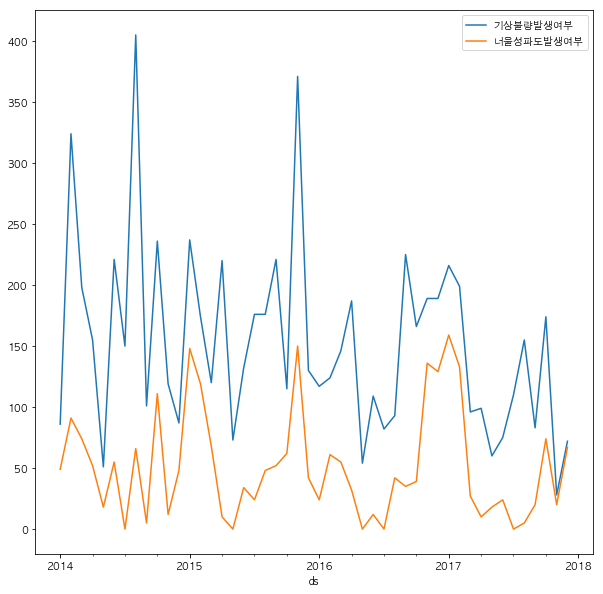

In [21]:
df[['기상불량발생여부', '너울성파도발생여부']]['2014':].resample('1M').sum().plot(figsize=(10,10))

### 2. 파주기 및 파고와 관계

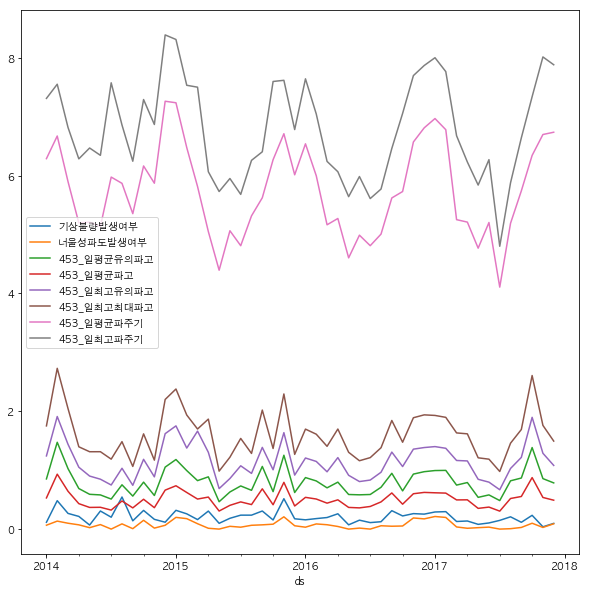

In [24]:
df[['기상불량발생여부', '너울성파도발생여부','453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기']]['2014':].resample('1M').mean().plot(figsize=(10,10))

### 3. 전체 Correlation

In [30]:
df[['기상불량발생여부', '너울성파도발생여부','453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기']]['2014':].corr(method='spearman')

,기상불량발생여부,너울성파도발생여부,453_일평균수온,453_일최고수온,453_일최저수온,453_일평균유의파고,453_일평균파고,453_일최고유의파고,453_일최고최대파고,453_일평균파주기,453_일최고파주기
기상불량발생여부,1.000000,0.534486,0.026156,0.010157,0.035972,0.337963,0.335834,0.340631,0.342168,0.231807,0.205769
너울성파도발생여부,0.534486,1.000000,-0.062877,-0.074176,-0.051584,0.293384,0.289306,0.271420,0.266201,0.349006,0.327504
453_일평균수온,0.026156,-0.062877,1.000000,0.990737,0.985931,-0.160216,-0.152104,-0.187216,-0.172082,-0.139630,-0.187946
453_일최고수온,0.010157,-0.074176,0.990737,1.000000,0.967413,-0.187166,-0.178150,-0.211133,-0.195535,-0.168214,-0.209043
453_일최저수온,0.035972,-0.051584,0.985931,0.967413,1.000000,-0.134800,-0.127315,-0.160035,-0.145490,-0.110129,-0.167289
453_일평균유의파고,0.337963,0.293384,-0.160216,-0.187166,-0.134800,1.000000,0.984574,0.940277,0.938461,0.696941,0.583927
453_일평균파고,0.335834,0.289306,-0.152104,-0.178150,-0.127315,0.984574,1.000000,0.934923,0.934393,0.678211,0.565790
453_일최고유의파고,0.340631,0.271420,-0.187216,-0.211133,-0.160035,0.940277,0.934923,1.000000,0.981160,0.635367,0.575073
453_일최고최대파고,0.342168,0.266201,-0.172082,-0.195535,-0.145490,0.938461,0.934393,0.981160,1.000000,0.621929,0.552402
453_일평균파주기,0.231807,0.349006,-0.139630,-0.168214,-0.110129,0.696941,0.678211,0.635367,0.621929,1.000000,0.906121


# 3. Feature Importance

###  1. df_xy_final은 결과 제출에서 사용한 데이터이다.

In [53]:
df_xy = pd.read_csv('../data/preprocessed data/df_xy_final.csv')

In [54]:
df_xy.columns

Index(['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '기온(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '지면온도(°C)', '30cm 지중온도(°C)', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기', '과거3일너울성파도발생시간', '과거10일너울성파도발생시간', '과거3일기상불량시간',
       '과거10일기상불량시간', '과거1일너울성파도발생시간', '과거1일기상불량시간'],
      dtype='object')

In [55]:
df_xy['ds'] = pd.to_datetime(df_xy['ds'])

In [56]:
df_xy.set_index('ds', inplace=True)

In [63]:
df_x = df_xy.drop(['기상불량발생여부', '너울성파도발생여부', '테스트여부', '과거1일너울성파도발생시간', '과거3일너울성파도발생시간', 
                   '과거10일너울성파도발생시간', '과거1일기상불량시간', '과거3일기상불량시간', '과거10일기상불량시간']
      , axis=1)
df_y = df_xy['너울성파도발생여부']

In [64]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df_x, df_y, test_size = 0.20)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (28051, 23)
Training Labels Shape: (28051,)
Testing Features Shape: (7013, 23)
Testing Labels Shape: (7013,)


In [65]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf1 = RandomForestClassifier(n_estimators=100, max_depth=5)
clf1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

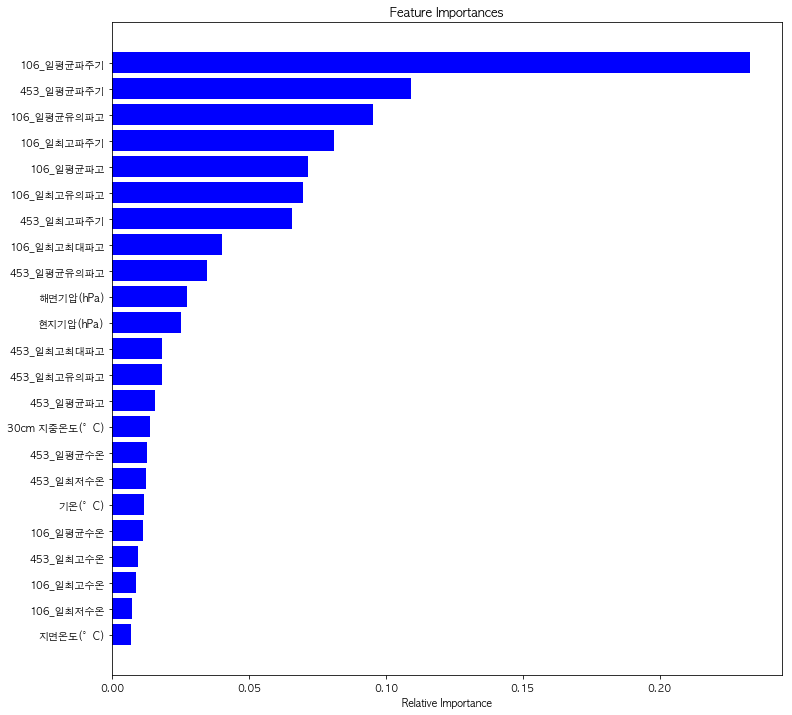

In [66]:
import matplotlib.pyplot as plt
importances = clf1.feature_importances_
values = sorted(zip(train_features.columns, clf1.feature_importances_), key=lambda x: x[1] * -1)

plt.rcParams["font.family"] = 'AppleGothic'

features = train_features.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 2. 과거 정보 포함

In [72]:
df_x = df_xy.drop(['기상불량발생여부', '너울성파도발생여부', '테스트여부']
      , axis=1)
df_y = df_xy['너울성파도발생여부']

In [73]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df_x, df_y, test_size = 0.20)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (28051, 29)
Training Labels Shape: (28051,)
Testing Features Shape: (7013, 29)
Testing Labels Shape: (7013,)


In [74]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf1 = RandomForestClassifier(n_estimators=100, max_depth=5)
clf1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

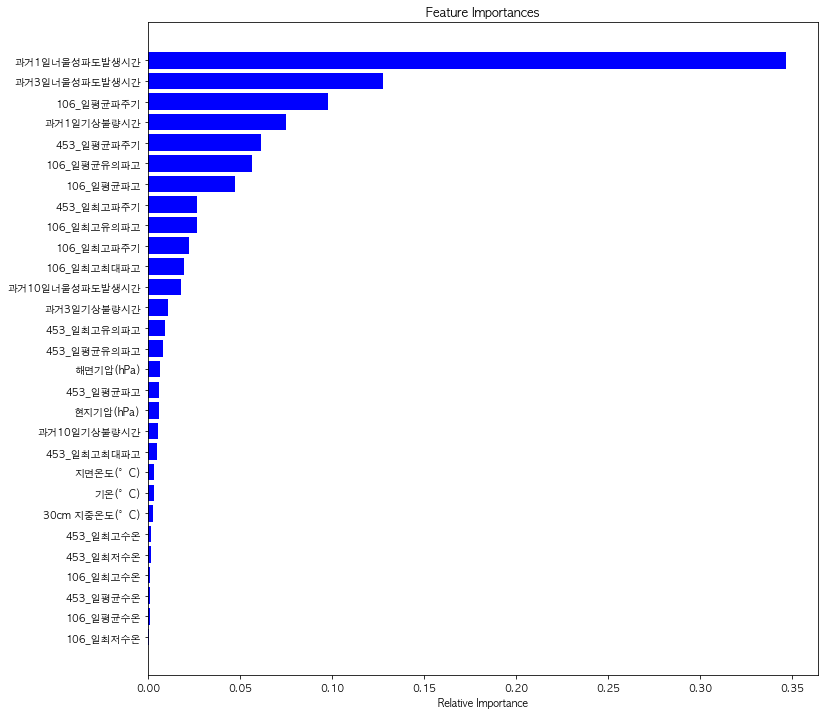

In [75]:
import matplotlib.pyplot as plt
importances = clf1.feature_importances_
values = sorted(zip(train_features.columns, clf1.feature_importances_), key=lambda x: x[1] * -1)

plt.rcParams["font.family"] = 'AppleGothic'

features = train_features.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()